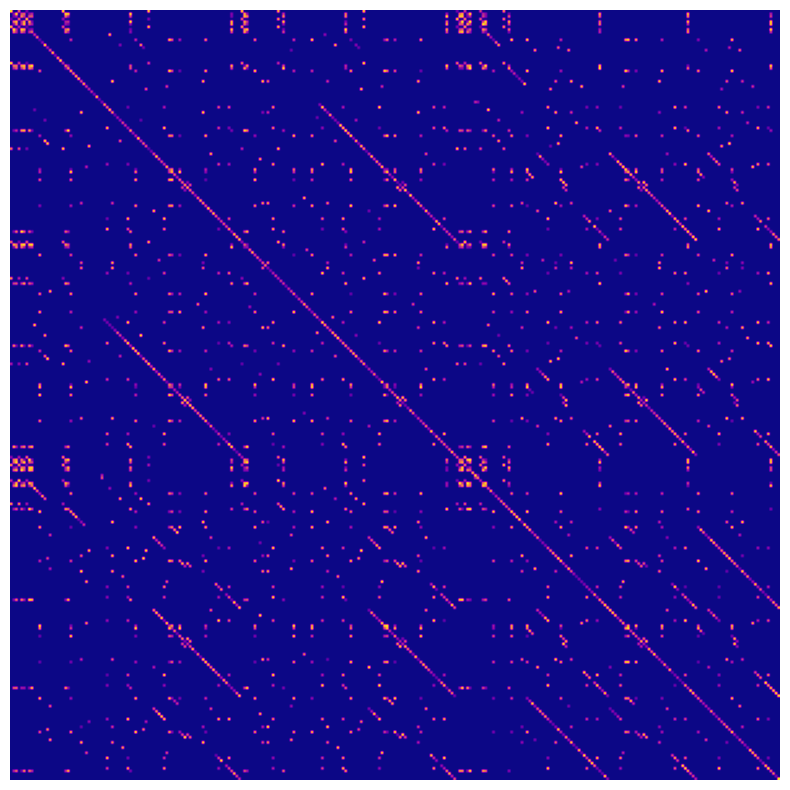

In [149]:
import numpy as np
import matplotlib.pyplot as plt

filename = 'baby_one_more_time'

with open(f'{filename}.txt', 'r') as file:
    file_content = file.read()

# Function to create a self-similarity matrix for the given text
def create_self_similarity_matrix(text):
    words = text.lower().replace('.', '').replace(',', '').replace('(', '').replace(')', '').replace("'", '').replace('"', '').split()
    n = len(words)
    matrix = np.zeros((n, n))
    for i in range(n):
        for j in range(n):
            if words[i] == words[j]:
                matrix[i, j] = 1
    return matrix

# Adjust the '1' values in the matrix
def adjust_matrix_values(matrix):
    adjusted_matrix = np.copy(matrix)
    for i in range(matrix.shape[0]):
        for j in range(matrix.shape[1]):
            if matrix[i, j] == 1:
                # Assign a random value from the second half of the colormap range
                adjusted_matrix[i, j] = 0.2 + random.random() * 0.8
    return adjusted_matrix

# Create and adjust the self-similarity matrix for the text
matrix = create_self_similarity_matrix(file_content)
adjusted_matrix = adjust_matrix_values(matrix)

# Plotting
plt.figure(figsize=(10, 10))
plt.imshow(adjusted_matrix, cmap='plasma')
plt.axis('off')  # Remove axis

plt.savefig(f'self_similarity_matrix_{filename}.png', dpi=300)
plt.show()

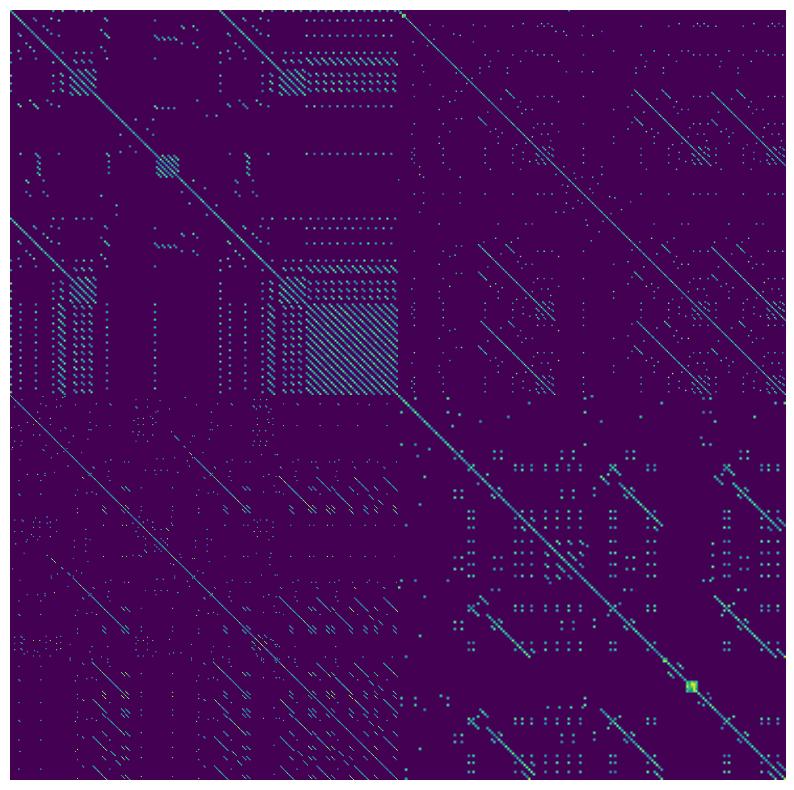

In [51]:
import numpy as np
import matplotlib.pyplot as plt
import random

texts =[]

with open('dumb.txt', 'r') as file:
    texts.append(file.read())

with open('starman.txt', 'r') as file:
    texts.append(file.read())

with open('nothing_stop_us.txt', 'r') as file:
    texts.append(file.read())

with open('creep.txt', 'r') as file:
    texts.append(file.read())

# Function to create a self-similarity matrix for a given text
def create_self_similarity_matrix(text):
    words = text.lower().replace('.', '').replace(',', '').split()
    n = len(words)
    matrix = np.zeros((n, n))
    for i in range(n):
        for j in range(n):
            if words[i] == words[j]:
                matrix[i, j] = 1
    return matrix

# Adjust the '1' values in the matrix
def adjust_matrix_values(matrix):
    adjusted_matrix = np.copy(matrix)
    for i in range(matrix.shape[0]):
        for j in range(matrix.shape[1]):
            if matrix[i, j] == 1:
                # Assign a random value from the second half of the colormap range
                adjusted_matrix[i, j] = 0.5 + random.random() * 0.5
    return adjusted_matrix

# Create and adjust self-similarity matrices for each text
adjusted_matrices = [adjust_matrix_values(create_self_similarity_matrix(text)) for text in texts]

# Plotting
fig, axs = plt.subplots(2, 2, figsize=(10, 10), subplot_kw={'xticks': [], 'yticks': [], 'frame_on': False})

# Remove space between subplots
plt.subplots_adjust(wspace=0, hspace=0)

# Plot each adjusted matrix
for ax, matrix in zip(axs.flat, adjusted_matrices):
    ax.imshow(matrix, cmap='viridis', aspect='auto')
    ax.axis('off')

plt.show()